In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
# %matplotlib 

In [2]:
%matplotlib inline

In [12]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
maxwell_rv = sts.maxwell()
sample = maxwell_rv.rvs(1000)
sample[:20]

array([0.40464627, 2.38918661, 2.31565008, 2.36965711, 0.58755352,
       1.06736854, 2.00200232, 0.83575275, 0.99879002, 1.15233652,
       1.78836512, 0.51985769, 3.26664716, 0.92621351, 0.82995774,
       1.70151029, 1.33608384, 1.85988185, 1.41476873, 1.18768123])

In [6]:
sample.dtype

dtype('float64')

In [8]:
real_mean = maxwell_rv.mean() # настоящее среднее случайной величины
real_mean

1.5957691216057308

In [10]:
real_var = maxwell_rv.var() # настоящая дисперсия случайной величины
real_var

0.45352091052967447

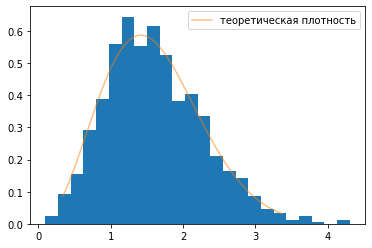

In [13]:
# ваш код тут
plt.hist(sample,bins='auto', density=True)
x = np.linspace(sts.maxwell.ppf(0.01),sts.maxwell.ppf(0.99), 1000)
pdf = maxwell_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

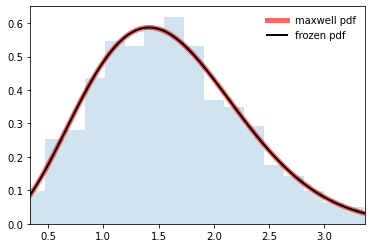

In [5]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = sts.maxwell.stats(moments='mvsk')

x = np.linspace(sts.maxwell.ppf(0.01),sts.maxwell.ppf(0.99), 100)
ax.plot(x, sts.maxwell.pdf(x),'r-', lw=5, alpha=0.6, label='maxwell pdf')

rv = sts.maxwell()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = sts.maxwell.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()


In [7]:
print('мат.ожидание - %.04f'%mean,'диссперсия - %.04f'%var)

мат.ожидание - 1.5958 диссперсия - 0.4535


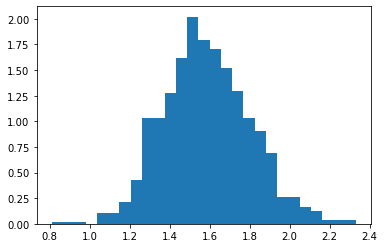

In [16]:
maxwell_rv = sts.maxwell()

N = 10
NN = 1000
# сгенерируем много выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(maxwell_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');

In [19]:
print(means[:30])

[1.4934250324681624, 1.798896447123824, 1.4960403251225203, 1.7195967067510467, 1.1398065256834546, 1.9950218719214061, 1.6873542267594694, 1.6864667868882148, 1.4727050119644574, 1.5383266871366577, 1.3899359210985582, 1.9180968856173173, 1.4508851795417632, 1.4765979741643576, 1.6484099141294397, 1.8186110750241198, 1.8804074824055266, 1.5471208907053264, 1.3250965295357982, 1.726681455644298, 1.2782577177267904, 1.705157842268291, 1.8613476369411408, 1.7606743376355154, 1.419862869677965, 1.3910127166981359, 1.7362296146768403, 1.7253932783810924, 1.772455429795659, 1.3448890210551643]


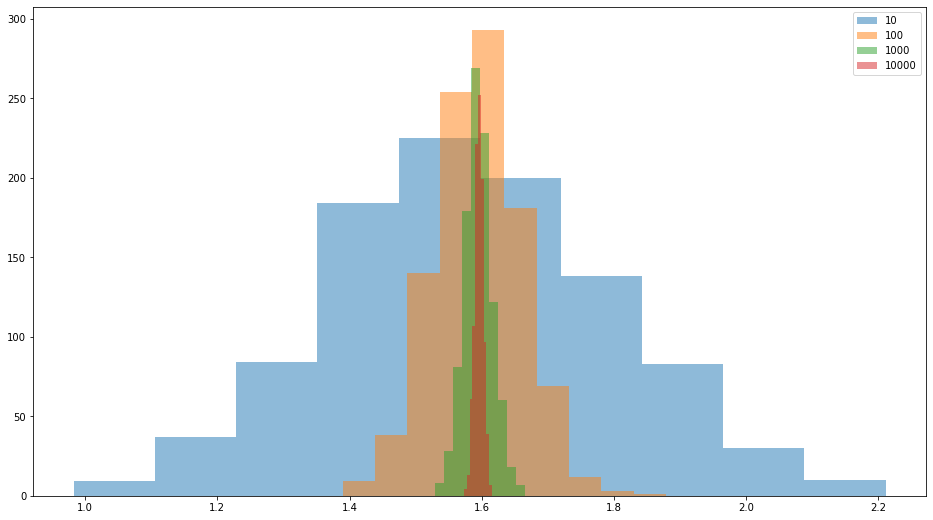

In [20]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(maxwell_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()